## Name: Samrudha Ganvir


# TASK - 1
# PREDICTION USING SUPERVISED ML

###### We are given a data set consisting of student scores and the number of hours they studied. In this task we have to predict the marks of student given the number of hours he or she studied.  





In [ ]:
#Importing the libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model


#### READING THE DATASET

In [ ]:
#Reading the data

url = 'http://bit.ly/w-data'
student_data = pd.read_csv(url)
print(student_data.head())

   Hours  Scores
0    2.5      21
1    5.1      47
2    3.2      27
3    8.5      75
4    3.5      30


#### PLOTTING THE DATASET

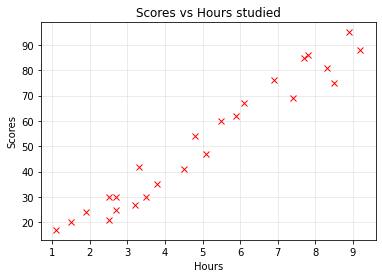

In [ ]:
x = np.asarray(student_data['Hours'])[:, np.newaxis]
y = np.asarray(student_data['Scores'])

plt.plot(x, y, 'x' , color='red')
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.title("Scores vs Hours studied")
plt.grid(alpha=0.3)
plt.show()

#### TRAINING THE ALGORITHM

In [ ]:
from sklearn.model_selection import train_test_split 

# Splitting the Dataset into train and test set using train_test_split
x_train, x_test,  y_train,  y_test = train_test_split(x, y, test_size=0.2, random_state=42)

lm = linear_model.LinearRegression()
lm.fit(x_train, y_train)

print('Training Done')

Training Done


#### PLOTTING THE LINE OF REGRESSION

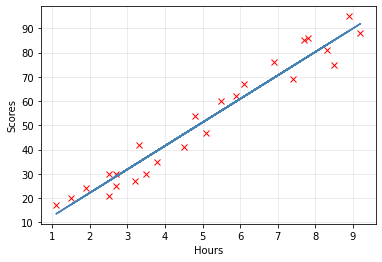

In [ ]:
Y = lm.intercept_ + lm.coef_ * x

plt.plot(x, y, 'x' , color='red')
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.plot(x, Y, '-', color = '#4682b4')
plt.grid(alpha=0.3)
plt.show()

#### PREDICTING SCORES FOR THE TEST SET

In [ ]:
y_pred = lm.predict(x_test)

x_t = x_test.reshape(5)

predictions = pd.DataFrame({'Study Hours': x_t ,'Predited scores' : y_pred , 'Actual scores' : y_test })
print(predictions)


   Study Hours  Predited scores  Actual scores
0          8.3        83.188141             81
1          2.5        27.032088             30
2          2.5        27.032088             21
3          6.9        69.633232             76
4          5.9        59.951153             62


#### PREDICTING SCORE FOR GIVEN STUDY HOURS

In [ ]:
hours = 9.25
marks = float((lm.predict([[hours]])).item())
print("The predicted score, if a student studies for", hours, "hours:", round(marks,2))

The predicted score, if a student studies for 9.25 hours: 92.39


#### ERROR CALCULATION

In [ ]:
from sklearn import metrics
import math

print("Mean Absolute Error: " , metrics.mean_absolute_error(y_test, y_pred))
print("Root Mean Squared Error: " , math.sqrt(metrics.mean_squared_error(y_test, y_pred)) )


Mean Absolute Error:  3.9207511902099244
Root Mean Squared Error:  4.352380006653288
